# Parkinsons Disease Telemonitoring Dataset

### By Bhargav Nallani Chakravarthula

Parkinson's disease is a degenerative disorder of the central nervous system. There is no cure for this disease, but medications, surgery and multidisciplinary management can provide relief from the symptoms.

The main goal of this study is to predict the Unified Parkinson’s disease rating scale (UPDRS) for classifying the stage of the disease, by remote telemonitoring of the patients. This reduces the costs and the inconvenience of physical visits.

In [215]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
from sklearn import preprocessing


df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.64310,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,1,72,0,12.66600,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
2,1,72,0,19.68100,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
3,1,72,0,25.64700,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,72,0,33.64200,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
5,1,72,0,40.65200,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
6,1,72,0,47.64900,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
7,1,72,0,54.64000,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
8,1,72,0,61.66900,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370
9,1,72,0,68.68800,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.201170


The data used for this study consist of a range of biomedical voice measurements from 42 people with early-stage Parkinson’s disease, recruited for a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient’s homes.

The number of recordings in the data set is 5.875 and there is a total of 22 variables (explained below) in each recording that are used to predict the total UPDRS scale.

Subject number: Integer that uniquely identifies each subject
Subject Age
Subject gender ‘0’ - male, ‘1’ - female
Test time - Time since recruitment into the trial. The integer part is the number of days since recruitment.

UPDRS: This is a clinician’s scale for recording symptoms related to Parkinson’s disease. The UPDRS metric consists of 44 sections, where each section addresses different symptoms in different parts of the body. Summing up these 44 sections gives rise to the total-UPDRS score, which spans the range 0-176, with 0 representing perfectly healthy individual and 176 total disability.

Motor UPDRS - Clinician’s motor UPDRS score, linearly interpolated - this forms sections 18-44 from the UPDRS sections
Total_UPDRS - Clinician’s total UPDRS score, linearly interpolated - this includes all 44 sections
Jitter Percentage - measure of variation in fundamental frequency
Jitter (Absolute) - measure of variation in fundamental frequency
Jitter (RAP) - measure of variation in fundamental frequency
Jitter (PPQ5) - measure of variation in fundamental frequency
Jitter (DDP) - measure of variation in fundamental frequency

Shimmer - measures of variation in amplitude
Shimmer(dB)- measure of variation in amplitude
Shimmer:APQ3- measure of variation in amplitude
Shimmer:APQ5- measure of variation in amplitude
Shimmer:APQ11- measure of variation in amplitude
Shimmer:DDA- measure of variation in amplitude

NHR: measures of ratio of noise to tonal components in the voice
HNR: measures of ratio of noise to tonal components in the voice

RPDE - A nonlinear dynamical complexity measure
DFA - Signal fractal scaling exponent
PPE - A nonlinear measure of fundamental frequency variation

I will aim to use UDPRS as the response variable.

In [217]:
df.corr()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


In [218]:
df = df.drop(['subject#'],axis = 1) #dropping Subject# as it doesnt hold any importortance

In [219]:
df['sex'].value_counts()

0    4008
1    1867
Name: sex, dtype: int64

Shuffling the DF and rearranging the index to split the data effectively

In [221]:
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop = True)
df

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,85,1,127.7300,16.7890,25.578,0.00468,0.000040,0.00176,0.00244,0.00528,...,0.366,0.01996,0.02260,0.03376,0.05989,0.029426,19.699,0.67554,0.63098,0.261550
1,60,0,74.7560,13.4240,17.848,0.00479,0.000047,0.00197,0.00193,0.00591,...,0.306,0.01800,0.01892,0.02247,0.05399,0.023493,17.635,0.55054,0.76796,0.208490
2,60,0,74.7580,13.4240,17.848,0.00432,0.000038,0.00177,0.00240,0.00532,...,0.311,0.01915,0.02187,0.02713,0.05745,0.021239,17.954,0.55803,0.76091,0.220080
3,73,1,15.5490,18.1690,24.169,0.00369,0.000020,0.00164,0.00190,0.00492,...,0.269,0.01540,0.01667,0.02855,0.04619,0.017438,20.363,0.54023,0.70390,0.213130
4,72,0,89.6350,31.3090,40.412,0.00991,0.000057,0.00417,0.00546,0.01251,...,0.440,0.01934,0.02627,0.03872,0.05801,0.069650,18.719,0.55590,0.59191,0.391010
5,57,1,21.5010,7.9954,11.995,0.00586,0.000032,0.00319,0.00273,0.00958,...,0.458,0.02781,0.03322,0.04311,0.08343,0.010711,24.695,0.42058,0.76497,0.201490
6,58,1,63.3940,10.8760,15.573,0.00153,0.000006,0.00055,0.00069,0.00164,...,0.056,0.00239,0.00267,0.00378,0.00718,0.004837,27.506,0.33285,0.54471,0.110930
7,57,1,40.8440,9.7558,10.858,0.00182,0.000008,0.00069,0.00091,0.00206,...,0.114,0.00500,0.00654,0.00915,0.01500,0.002287,30.228,0.56133,0.65360,0.106820
8,61,0,-4.2597,19.7250,28.634,0.00352,0.000027,0.00125,0.00169,0.00376,...,0.159,0.00739,0.00914,0.01465,0.02216,0.009635,24.315,0.58904,0.57961,0.162960
9,75,0,154.3200,33.2530,44.253,0.00479,0.000040,0.00207,0.00241,0.00620,...,0.295,0.01709,0.01831,0.02619,0.05126,0.033974,21.223,0.45862,0.64828,0.274150


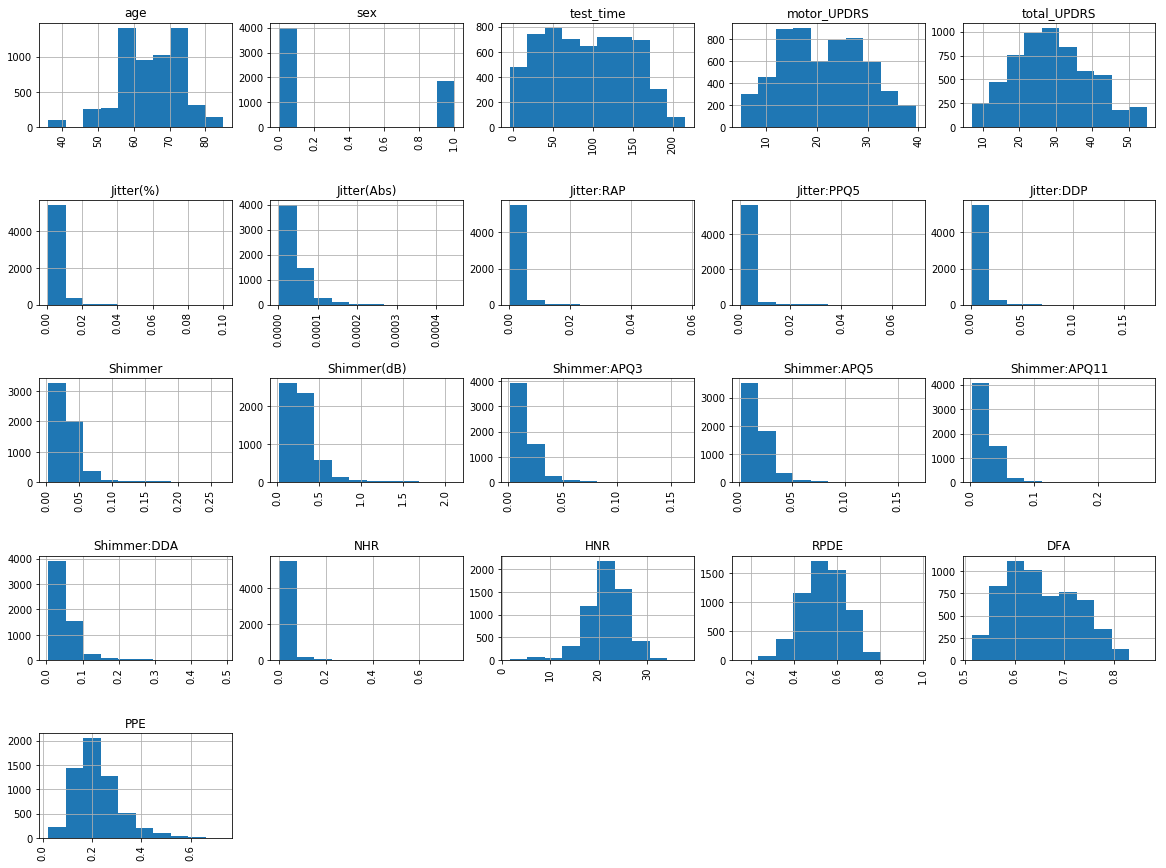

In [276]:
#Data Analysis
from math import ceil
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (20,15))
cols = 5
rows = ceil(float(df.shape[1])/cols)
for i,column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    df[column].hist(axes = ax)
    plt.xticks(rotation = "vertical")
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
plt.show()

Considering Total UPDRS as decision attribute

In [310]:
Y = df['total_UPDRS']
Y.head()

0    25.578
1    17.848
2    17.848
3    24.169
4    40.412
Name: total_UPDRS, dtype: float64

In [309]:
X = df.drop(['total_UPDRS'], axis = 1) 
X.head()

,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,85,1,127.730,16.789,0.00468,0.000040,0.00176,0.00244,0.00528,0.03880,0.366,0.01996,0.02260,0.03376,0.05989,0.029426,19.699,0.67554,0.63098,0.26155
1,60,0,74.756,13.424,0.00479,0.000047,0.00197,0.00193,0.00591,0.03375,0.306,0.01800,0.01892,0.02247,0.05399,0.023493,17.635,0.55054,0.76796,0.20849
2,60,0,74.758,13.424,0.00432,0.000038,0.00177,0.00240,0.00532,0.03613,0.311,0.01915,0.02187,0.02713,0.05745,0.021239,17.954,0.55803,0.76091,0.22008
3,73,1,15.549,18.169,0.00369,0.000020,0.00164,0.00190,0.00492,0.03127,0.269,0.01540,0.01667,0.02855,0.04619,0.017438,20.363,0.54023,0.70390,0.21313
4,72,0,89.635,31.309,0.00991,0.000057,0.00417,0.00546,0.01251,0.04233,0.440,0.01934,0.02627,0.03872,0.05801,0.069650,18.719,0.55590,0.59191,0.39101


In [228]:
#X_processed = preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
#y_shapes = Y.reshape(-1,1)
#Y_processed = preprocessing.normalize(y_shapes)

C:\Users\Public\anaconda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Cross validation of data - test set size is 25%

In [230]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [240]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size = 0.25, random_state = 42)

### Fitting the models

Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

In [242]:
Y_pred = regressor.predict(X_test)

In [243]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_pred,Y_test )

21.27110006013157

In [244]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred) 

0.8170210789109138

Random forest regression

In [245]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(max_depth=5, n_estimators = 100)
RandomForest.fit(X_test,Y_test)
Y_pred_RandomForest = RandomForest.predict(X_test)
mean_squared_error(Y_test, Y_pred_RandomForest )


11.386005209221135

In [246]:
r2_score(Y_test,Y_pred_RandomForest) 

0.90205495048171414

Gradient Boosting

In [247]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(loss = 'ls', learning_rate = 0.1 , max_depth=5,n_estimators=250)

gbr.fit(X_train,Y_train)
y_pred_gradient=gbr.predict(X_test)

mean_squared_error(Y_test, y_pred_gradient )

4.4376132034942666

In [248]:
r2_score(Y_test,y_pred_gradient) 

0.96182662514441475

In [249]:
Y_test = Y_test.values.reshape((-1,1))
Y_train = Y_train.values.reshape((-1,1))

In [251]:
X_train.shape

(4406, 20)

### As you can see, Gradient Boosting gave us the best results with 98% accuracy

## Implementation in Tensor Flow

In [253]:
import tensorflow as tf

In [254]:
tf.reset_default_graph()


Construction Phase

In [255]:
n_samples = X_train.shape[0]
n_features = X_train.shape[1]

print(n_features)
print(n_samples)

20
4406


In [256]:
X_train.shape

(4406, 20)

In [257]:
X = tf.placeholder(tf.float32, shape=X_train.shape)
Y = tf.placeholder(tf.float32, shape=Y_train.shape)

In [258]:
X.shape
Y.shape

TensorShape([Dimension(4406), Dimension(1)])

In [303]:
learning_rate = 0.01
training_epochs = 500

In [260]:
#defining variables
W = tf.Variable(ny.random.rand(n_features,1), dtype = tf.float32)
b = tf.Variable(1, dtype = tf.float32)

In [261]:
print(W)
#tf.matmul(T1, tf.expand_dims(x, 1))
pred = tf.add(tf.matmul(X, W),b, name = "z")

<tf.Variable 'Variable:0' shape=(20, 1) dtype=float32_ref>


In [262]:
pred =  tf.add(tf.matmul(X, W), b, name="z")

In [270]:
cost = tf.reduce_mean(tf.square(pred - Y_train))

In [307]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #defining optimizer

In [265]:
init = tf.global_variables_initializer()

In [266]:
X_train.shape

(4406, 20)

In [267]:
Y_train.shape

(4406, 1)

Evaluation phase

In [308]:
# tf.reset_default_graph()
display_step = 50
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X:X_train, Y:Y_train})
        
        if (epoch+1) % display_step == 0:
            c = (sess.run(cost, feed_dict={X: X_train, Y:Y_train}))/10
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: X_train, Y: Y_train})/10
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    ''''plt.plot(X_train, Y_train, 'ro', label='Original data')
    plt.plot(X_train, X_train * sess.run(W) + b, label='Fitted line')
    plt.legend()
    plt.show()'''

Epoch: 0050 cost= 12.845008850 W= [[ 7.43770647]
 [ 0.4983035 ]
 [ 8.5810318 ]
 [ 3.56240416]
 [ 0.2023958 ]
 [ 0.71688521]
 [ 0.31283042]
 [ 0.62883008]
 [ 0.78102136]
 [ 0.36518151]
 [ 0.05111282]
 [ 0.37318417]
 [ 0.24171576]
 [ 0.86161977]
 [ 0.76116395]
 [ 0.56063485]
 [ 2.66786981]
 [ 0.62627864]
 [ 0.22569658]
 [ 0.64167893]] b= 13.5269
Epoch: 0100 cost= 11.161668396 W= [[ 8.4704504 ]
 [ 0.49736172]
 [ 9.73360348]
 [ 4.53913927]
 [ 0.20251459]
 [ 0.71688545]
 [ 0.31288725]
 [ 0.62889451]
 [ 0.78119189]
 [ 0.36581078]
 [ 0.05693681]
 [ 0.37347987]
 [ 0.24208944]
 [ 0.86219585]
 [ 0.76205075]
 [ 0.56140846]
 [ 2.8533771 ]
 [ 0.63462621]
 [ 0.23281048]
 [ 0.64573079]] b= 15.3579
Epoch: 0150 cost= 11.041224670 W= [[ 8.588871  ]
 [ 0.49185681]
 [ 9.81783199]
 [ 5.21500063]
 [ 0.20254539]
 [ 0.71688545]
 [ 0.31290135]
 [ 0.62891191]
 [ 0.7812342 ]
 [ 0.36594939]
 [ 0.05828259]
 [ 0.37352887]
 [ 0.24217196]
 [ 0.86237466]
 [ 0.76219755]
 [ 0.56171632]
 [ 2.73162866]
 [ 0.63524395]
 [ 0

Regression using simple neural networks perform in similar way as a model without neural networks.